In [98]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from datetime import datetime

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import cluster
pd.set_option("display.max_rows", 20)
 

STEM = pd.read_csv("Levels_Fyi_Salary_Data.csv")
STOCKS = pd.read_csv("Stocks.csv")
#STEM = pd.read_csv(r"C:\Users\00gun\Desktop\Fall 2021\COMP 3625\A2\Levels_Fyi_Salary_Data.csv")
#STOCKS = pd.read_csv(r"C:\Users\00gun\Desktop\Fall 2021\COMP 3625\A2\Stocks.csv")
print(STOCKS.shape)
print(STEM.shape)
print("The STEM salaries dataset has {} rows and {} columns.".format(STEM.shape[0], STEM.shape[1]))
print("The STOCKS dataset has {} rows and {} columns.".format(STOCKS.shape[0],STOCKS.shape[1]))

(5, 2)
(62642, 12)
The STEM salaries dataset has 62642 rows and 12 columns.
The STOCKS dataset has 5 rows and 2 columns.


In [99]:
STEM.head

<bound method NDFrame.head of           company                         title  totalyearlycompensation  \
0          Oracle               Product Manager                   127000   
1            eBay             Software Engineer                   100000   
2          Amazon               Product Manager                   310000   
3           Apple  Software Engineering Manager                   372000   
4       Microsoft             Software Engineer                   157000   
...           ...                           ...                      ...   
62637      Google             Software Engineer                   327000   
62638   Microsoft             Software Engineer                   237000   
62639        MSFT             Software Engineer                   220000   
62640  Salesforce             Software Engineer                   280000   
62641       apple             Software Engineer                   200000   

                location  yearsofexperience  yearsatcompa

In [100]:
for col in STEM.columns:
    print(col)

company
title
totalyearlycompensation
location
yearsofexperience
yearsatcompany
basesalary
stockgrantvalue
bonus
gender
Race
Education


In [101]:
print(STEM.dtypes)

company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
gender                      object
Race                        object
Education                   object
dtype: object


In [102]:
print(type(STEM))
print(type(STEM.company))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [103]:
STEM.company

0            Oracle
1              eBay
2            Amazon
3             Apple
4         Microsoft
            ...    
62637        Google
62638     Microsoft
62639          MSFT
62640    Salesforce
62641         apple
Name: company, Length: 62642, dtype: object

In [104]:
print(type(STEM.gender.value_counts()))
STEM.gender.value_counts()

<class 'pandas.core.series.Series'>


Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [105]:
STEM['Total_salary'] = STEM['basesalary'] + STEM['bonus']
income_labels =['Very low', 'Low', 'Mid', 'Upper Mid', 'High', 'Very High']
STEM['Salary_group'] = pd.qcut( STEM['Total_salary'], q = [0, 0.10, 0.20, 0.60, 0.90, 0.95, 1], labels = income_labels)
STEM.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education,Total_salary,Salary_group
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000,20000.0,10000.0,NaN,NaN,NaN,117000.0,Mid
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0,0.0,0.0,NaN,NaN,NaN,0.0,Very low
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000,0.0,0.0,NaN,NaN,NaN,155000.0,Mid
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000,180000.0,35000.0,NaN,NaN,NaN,192000.0,Upper Mid
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0,0.0,0.0,NaN,NaN,NaN,0.0,Very low


In [106]:
STEM.Salary_group.value_counts()

Mid          24765
Upper Mid    19122
Low           6522
Very low      6309
Very High     3015
High          2909
Name: Salary_group, dtype: int64

<AxesSubplot:>

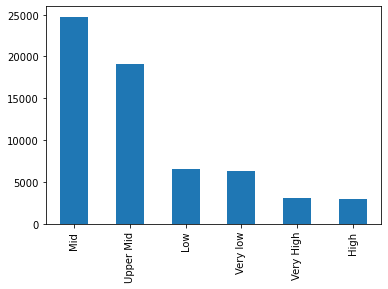

In [107]:
fig, ax = plt.subplots()
STEM.Salary_group.value_counts().plot ( kind = "bar", x = 'Salary_group',ax = ax)


<AxesSubplot:xlabel='company', ylabel='Stock_avg'>

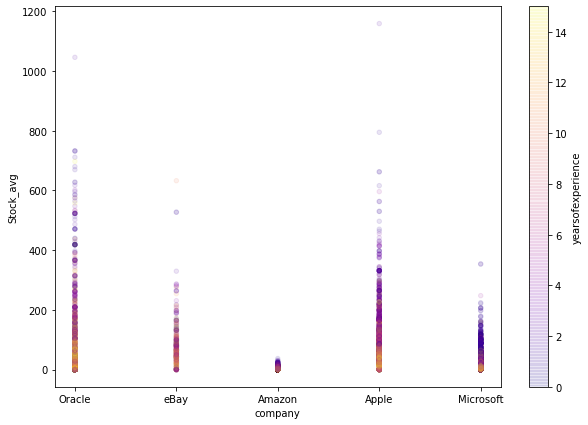

In [108]:
combine = pd.merge(STEM, STOCKS[['company', 'Stock Price (As of Nov 16 2021)']], on='company')
combine["Stock_amount"] = combine["stockgrantvalue"] / combine["Stock Price (As of Nov 16 2021)"]
combine["Stock_avg"] = combine["Stock_amount"] / combine["yearsofexperience"]


fig, ax = plt.subplots()
combine.plot( kind = "scatter", x = "company", y = "Stock_avg", alpha = 0.1,
            figsize = (10,7), c = "yearsofexperience", vmin = 0, vmax = 15,
             cmap = plt.get_cmap("plasma"),  ax=ax)



<AxesSubplot:xlabel='gender', ylabel='Total_salary'>

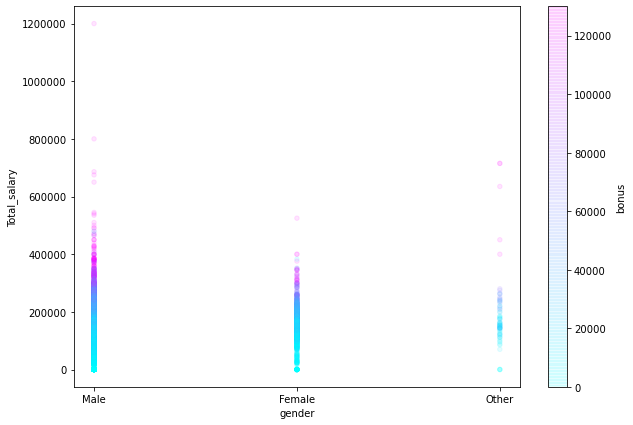

In [109]:
df3 = pd.DataFrame(combine)
df3[df3['gender'].isna()]
df3.dropna( axis = 0, subset = ["gender"], inplace = True)
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain')
df3.plot( kind = "scatter", x = "gender", y = "Total_salary",alpha = 0.1,
        figsize = (10,7), c = "bonus", vmin = 0, 
         vmax = 130000, cmap = plt.get_cmap("cool"), ax = ax)




<AxesSubplot:xlabel='Education', ylabel='Total_salary'>

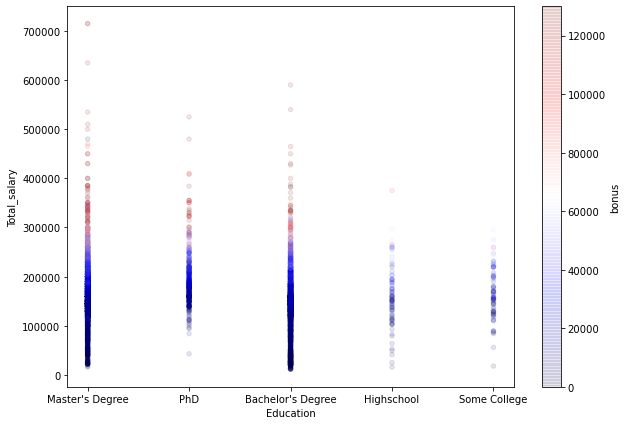

In [110]:
df4 = pd.DataFrame(combine)

df4.dropna( axis = 0, subset = ["Education"], inplace = True)
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False, style='plain')

df4.plot( kind = "scatter", x = "Education", y = "Total_salary",alpha = 0.1,
        figsize = (10,7), c = "bonus", vmin = 0, 
         vmax = 130000, cmap = plt.get_cmap("seismic"), ax = ax)

In [111]:
column_use =  ['basesalary', 'stockgrantvalue', 'totalyearlycompensation']
print(type(column_use))

X = combine[column_use]
print(type(X))
print(X)

y = combine.Salary_group
print(type(y))
print(y)



<class 'list'>
<class 'pandas.core.frame.DataFrame'>
       basesalary  stockgrantvalue  totalyearlycompensation
0          107000          20000.0                   127000
1          107000          33000.0                   150000
2               0              0.0                   320000
3               0              0.0                   300000
4          123000           5000.0                   128000
...           ...              ...                      ...
16831      106500          20000.0                   122000
16832      116000          42850.0                   171000
16833      108000          17500.0                   132000
16834      180000          25000.0                   250000
16835      146900          73200.0                   237000

[16836 rows x 3 columns]
<class 'pandas.core.series.Series'>
0              Mid
1              Mid
2         Very low
3         Very low
4              Mid
           ...    
16831          Mid
16832          Mid
16833        

In [112]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 1)
print( "X_train type = ", type(X_train))
print( "X_train = ", X_train.shape, "X_test= ", X_test.shape, "y_train = ", y_train.shape, "y_test = ", y_test.shape)

X_train type =  <class 'pandas.core.frame.DataFrame'>
X_train =  (13468, 3) X_test=  (3368, 3) y_train =  (13468,) y_test =  (3368,)


In [113]:
X_train.head()
y_train.head()

9129           Mid
15111          Mid
13137          Mid
4252     Upper Mid
221            Mid
Name: Salary_group, dtype: category
Categories (6, object): ['Very low' < 'Low' < 'Mid' < 'Upper Mid' < 'High' < 'Very High']

In [114]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit( X_train, y_train)


In [115]:
y_predict = decision_tree.predict(X_test)

print( "\nAccuracy:", metrics.accuracy_score( y_test, y_predict))


Accuracy: 0.9524940617577197


In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y_test, y_predict)

array([[  89,    0,    4,   14,   17,    0],
       [   0,  161,    5,    0,    0,    3],
       [   0,    7, 1596,   28,    1,    0],
       [  11,    2,   46,  938,    0,    0],
       [  10,    0,    1,    6,  104,    0],
       [   0,    5,    0,    0,    0,  320]], dtype=int64)

In [117]:
sp =['Very low', 'Low', 'Mid', 'Upper Mid', 'High', 'Very High']
confusion_matrix( y_test, y_predict, labels = sp)

array([[ 320,    5,    0,    0,    0,    0],
       [   3,  161,    5,    0,    0,    0],
       [   0,    7, 1596,   28,    0,    1],
       [   0,    2,   46,  938,   11,    0],
       [   0,    0,    4,   14,   89,   17],
       [   0,    0,    1,    6,   10,  104]], dtype=int64)

In [118]:
display = pd.DataFrame(
    confusion_matrix( y_test, y_predict, labels = sp), 
    index=['true:Very low', 'true:Low', 'true:Mid', 'true:Upper Mid', 'true:High', 'true:Very High'], 
    columns=['pred:Very low', 'pred:Low', 'pred:Mid', 'pred:Upper Mid', 'pred:High', 'pred:Very High']
)
print(display)

                pred:Very low  pred:Low  pred:Mid  pred:Upper Mid  pred:High  \
true:Very low             320         5         0               0          0   
true:Low                    3       161         5               0          0   
true:Mid                    0         7      1596              28          0   
true:Upper Mid              0         2        46             938         11   
true:High                   0         0         4              14         89   
true:Very High              0         0         1               6         10   

                pred:Very High  
true:Very low                0  
true:Low                     0  
true:Mid                     1  
true:Upper Mid               0  
true:High                   17  
true:Very High             104  


Text(0, 0.5, 'Years worked at company')

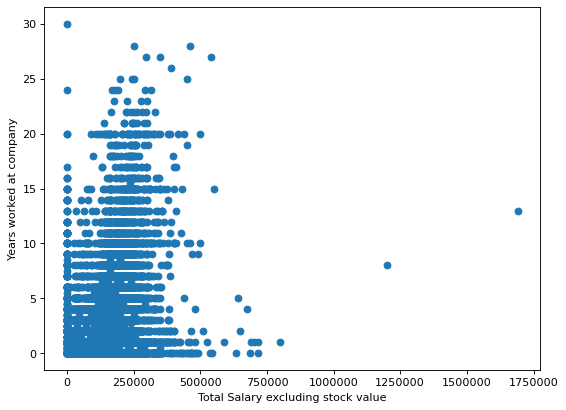

In [119]:
from matplotlib.pyplot import figure

df5 = pd.DataFrame([combine.Total_salary, combine.yearsatcompany]).transpose()
df5.dropna( axis = 0, subset = ["Total_salary"], inplace = True)
df5.dropna( axis = 0, subset = ["yearsatcompany"], inplace = True)
figure(figsize=(8, 6), dpi=80)
plt.ticklabel_format(style='plain')
plt.scatter(df5.Total_salary, df5.yearsatcompany)
plt.xlabel('Total Salary excluding stock value')
plt.ylabel('Years worked at company')



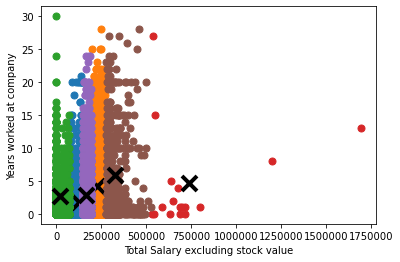

In [120]:
comb = np.array(df5)
k = 6
kmeans = cluster.KMeans( n_clusters=k)
kmeans.fit( df5)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations with cluster label == i
    ds = comb[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.ticklabel_format(style='plain')
    plt.xlabel('Total Salary excluding stock value')
    plt.ylabel('Years worked at company')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()
